In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [45]:
df = pd.read_csv('../data/at-dataset/final_data.csv')
df["DateTime"] = pd.to_datetime(df["DateTime"])

In [46]:
#show for each site how many lane it have
site_lane_count = df.groupby("Detector_ID")["Lane"].nunique().reset_index(name="num_lanes")
print(site_lane_count)


   Detector_ID  num_lanes
0         2013         13
1         2061         12
2         2257         19
3         2322          6
4         2402          7


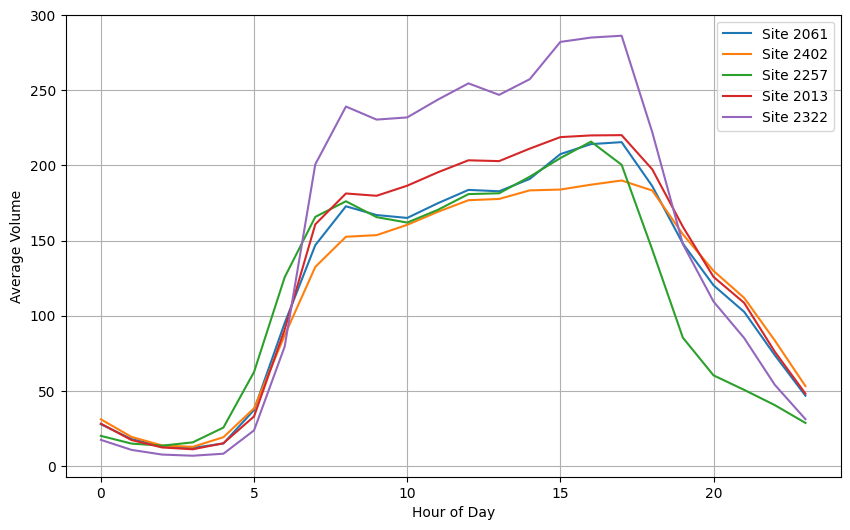

In [ ]:
# start_date = "2024-01-01"
# end_date = "2024-12-31"
start_date = df['DateTime'].min()
end_date = df['DateTime'].max()
site_list = df['Detector_ID'].unique()
plt.figure(figsize=(10, 6))

for site in site_list:
    roi = df[(df["DateTime"] >= start_date) & (df["DateTime"] <= end_date) & (df['Detector_ID'] == site)]
    avg_day = roi.groupby(roi["DateTime"].dt.hour)["Volume"].mean()
    plt.plot(avg_day.index, avg_day.values, label=f"Site {site}")

# plt.title(f"Average Hourly Traffic Volume for Site {site}")
plt.xlabel("Hour of Day")
plt.ylabel("Average Volume")

plt.grid()
plt.legend()    
plt.show()


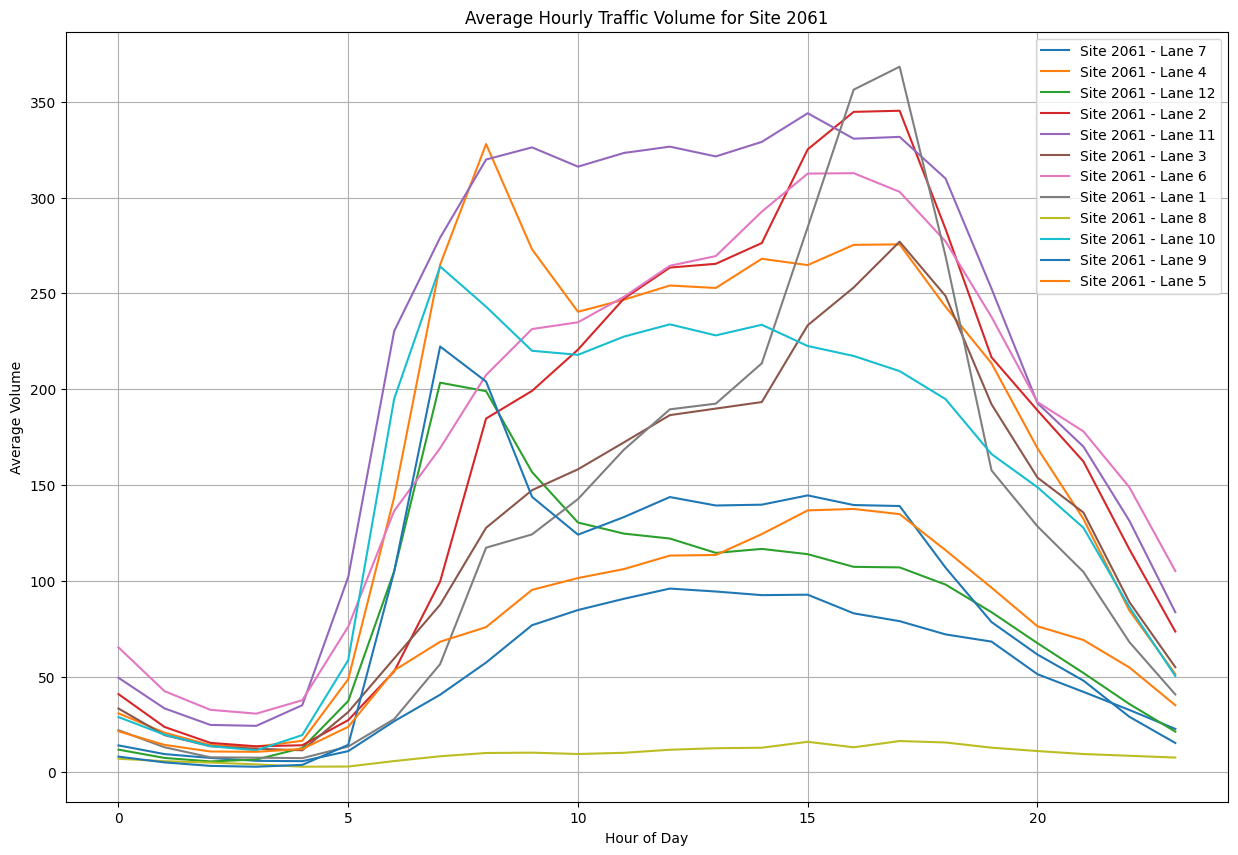

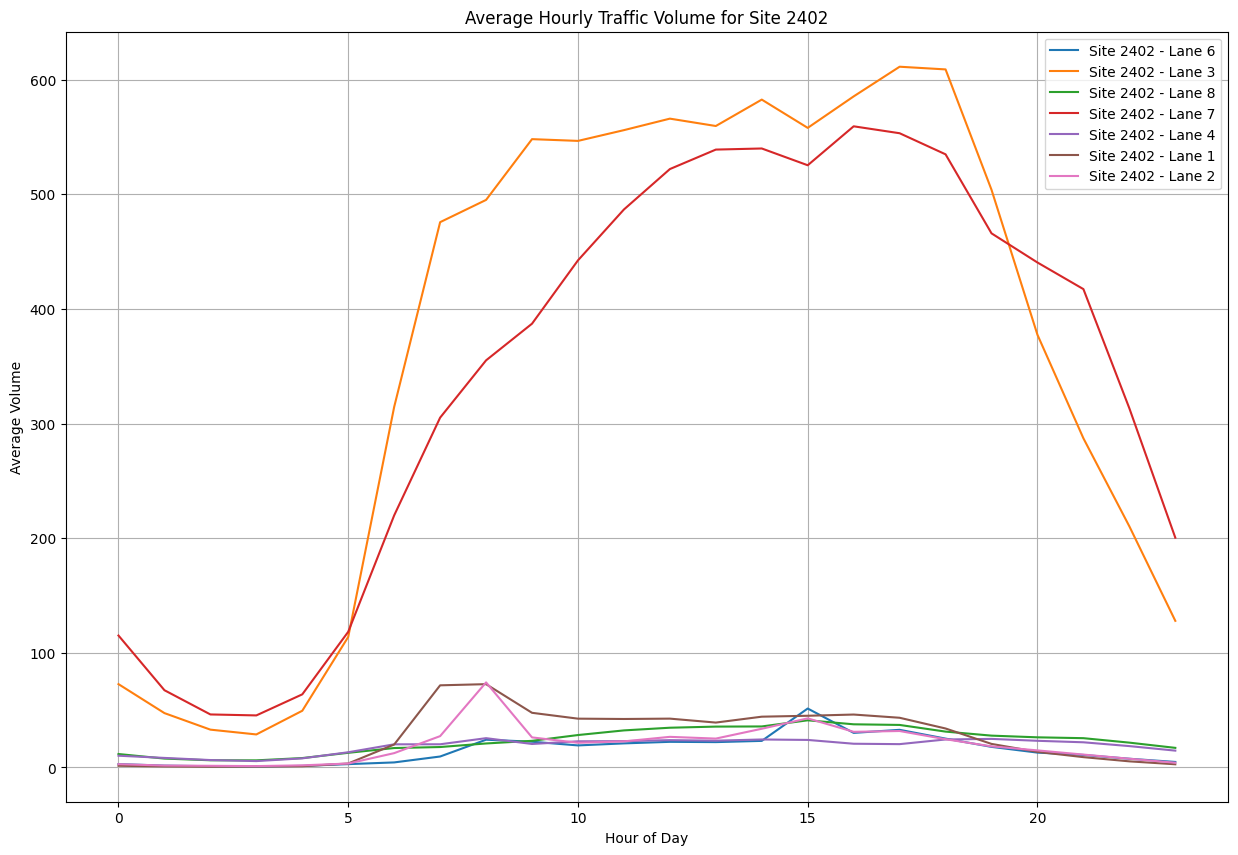

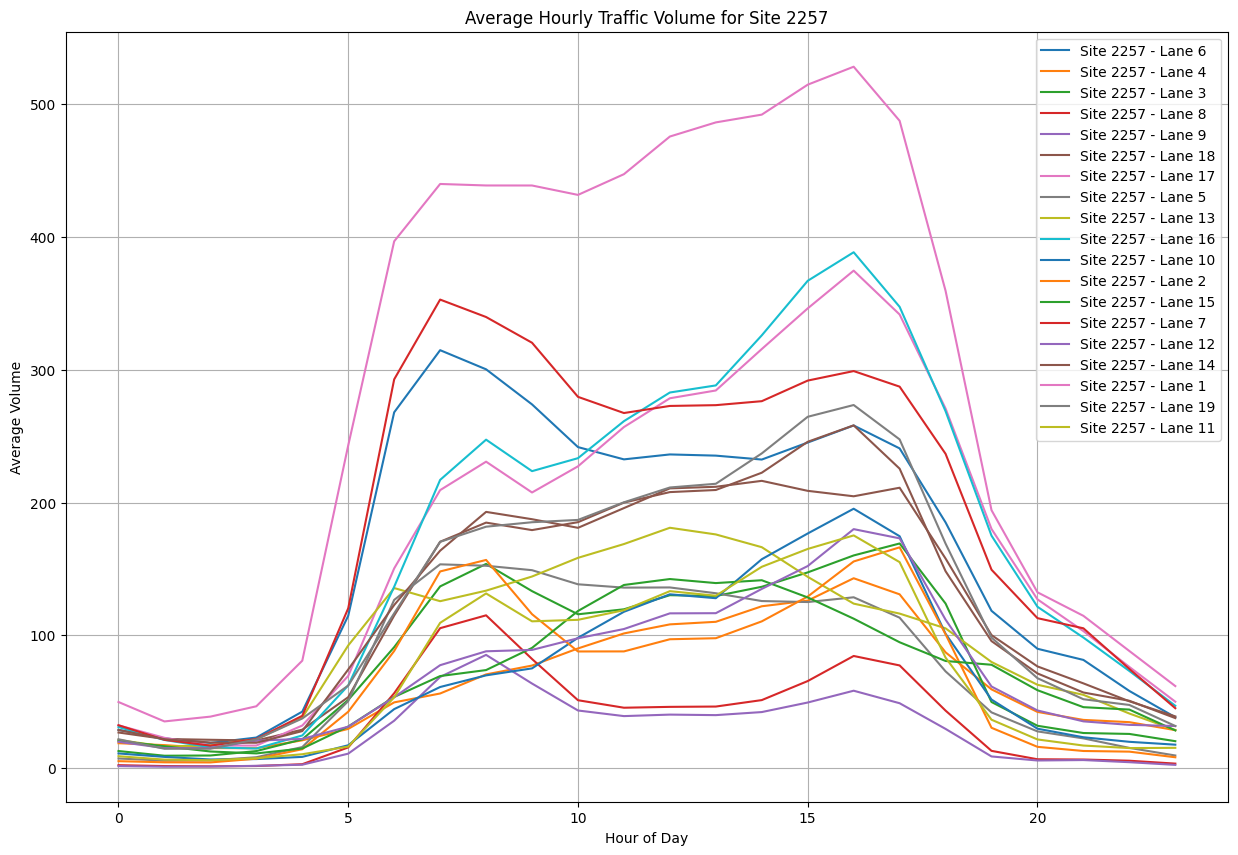

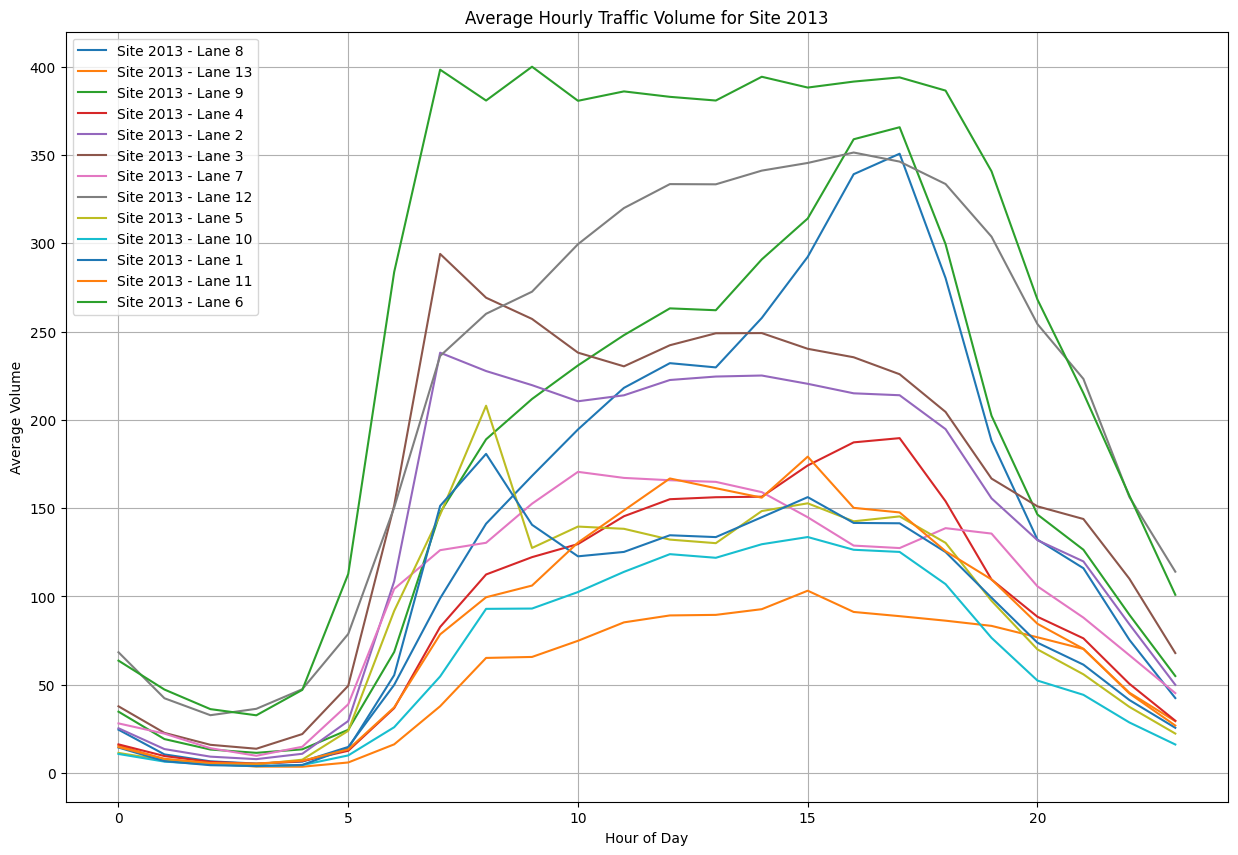

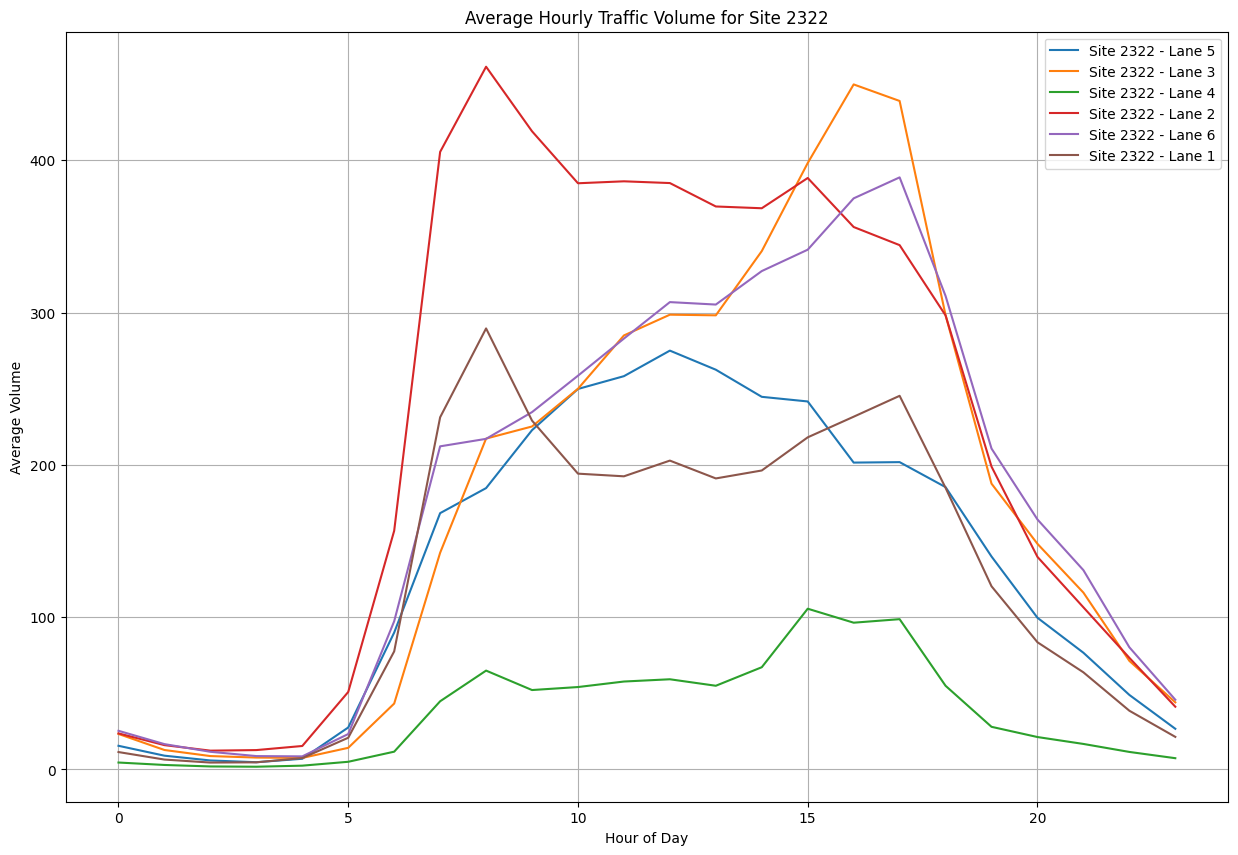

In [62]:
# start_date = "2024-01-01"
# end_date = "2024-12-31"
start_date = df['DateTime'].min()
end_date = df['DateTime'].max()
site_list = df['Detector_ID'].unique()


for site in site_list:
    plt.figure(figsize=(15, 10))
    lane_list = df[df['Detector_ID'] == site]['Lane'].unique()
    for lane in lane_list:
        roi = df[(df["DateTime"] >= start_date) & (df["DateTime"] <= end_date) & (df['Detector_ID'] == site) & (df['Lane'] == lane)]
        roi.sort_values("Lane")
        avg_day = roi.groupby(roi["DateTime"].dt.hour)["Volume"].mean()
        plt.plot(avg_day.index, avg_day.values, label=f"Site {site} - Lane {lane}")
    plt.title(f"Average Hourly Traffic Volume for Site {site}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Volume")
    plt.grid()
    plt.legend()
    plt.show()
